In [2]:
import pandas as pd, matplotlib.pyplot as plt, os

import seaborn as sns; sns.set()

from IPython.display import display, HTML

In [3]:
currencies = ['EUR', 'JPY', 'GBP', 'CHF']


In [4]:
xccy = pd.read_excel('1y xccy spreads (USD LIBOR).xlsx', index_col=0)

xccy.index = pd.to_datetime(xccy.index)

xccy = xccy.sort_index()[currencies]

xccy.rename(lambda x: x + " LIBOR basis", axis='columns', inplace=True)

xccy

,EUR LIBOR basis,JPY LIBOR basis,GBP LIBOR basis,CHF LIBOR basis
Date,,,,
2018-10-11,-21.750,-35.375,0.2500,-17.25
2018-10-12,-22.250,-36.750,-0.8750,-19.25
2018-10-15,-22.250,-36.750,-1.0000,-19.50
2018-10-16,-21.375,-35.625,-0.1250,-19.50
2018-10-17,-20.500,-35.125,-0.6250,-19.00
...,...,...,...,...
2020-10-05,-7.250,-20.875,-0.1250,-7.50
2020-10-06,-6.125,-20.625,0.5000,-7.00
2020-10-07,-6.000,-20.500,0.8750,-6.00


In [5]:
libor_list = []

for ccy in currencies:
    df = pd.read_excel('libor_1y_data.xlsx', sheet_name=ccy.upper() + " 1y").rename(lambda x: ccy + " LIBOR" if x=='Ask Price' else x, axis='columns').set_index('Date')
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    libor_list.append(df)
    
libor = pd.concat(libor_list, axis=1)
    
libor


,EUR LIBOR,JPY LIBOR,GBP LIBOR,CHF LIBOR
Date,,,,
2018-10-11,-0.21057,0.12883,1.08994,-0.5270
2018-10-12,-0.21329,0.12450,1.08706,-0.5262
2018-10-15,-0.21271,0.12933,1.07606,-0.5286
2018-10-16,-0.21543,0.12533,1.07831,-0.5286
2018-10-17,-0.21414,0.12633,1.07588,-0.5312
...,...,...,...,...
2020-10-05,-0.44257,0.04517,0.15213,-0.6004
2020-10-06,-0.44129,0.05117,0.15150,-0.5976
2020-10-07,-0.44086,0.04883,0.15200,-0.5978


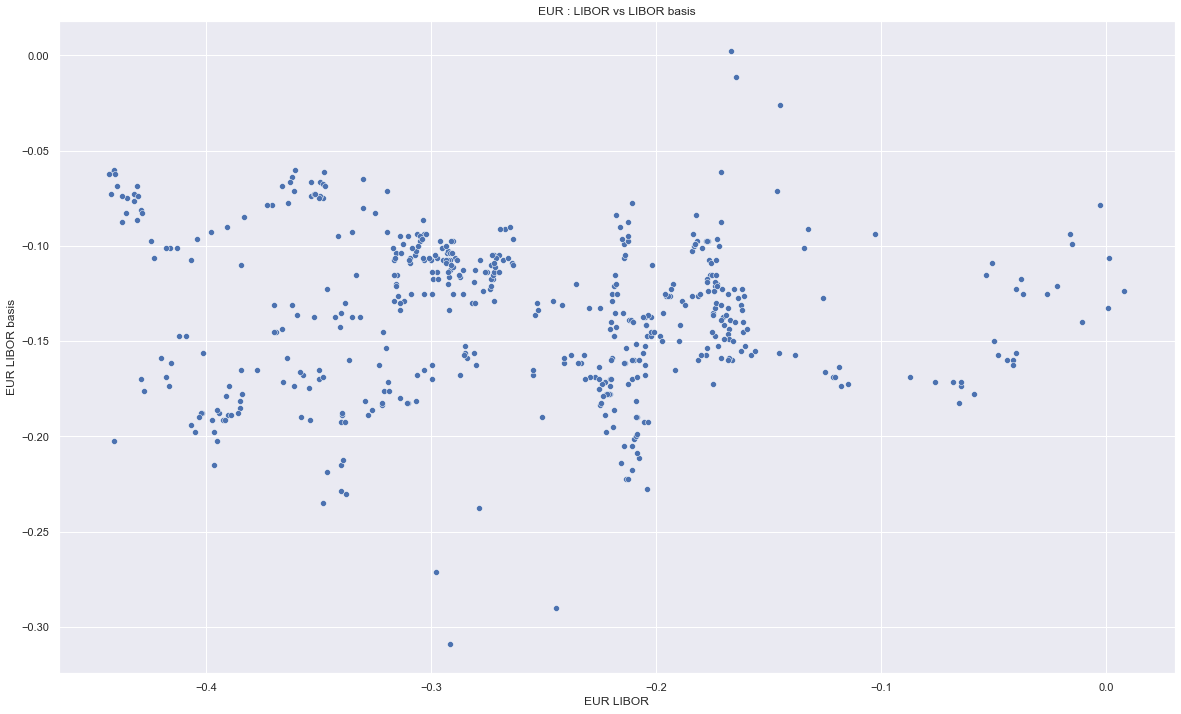

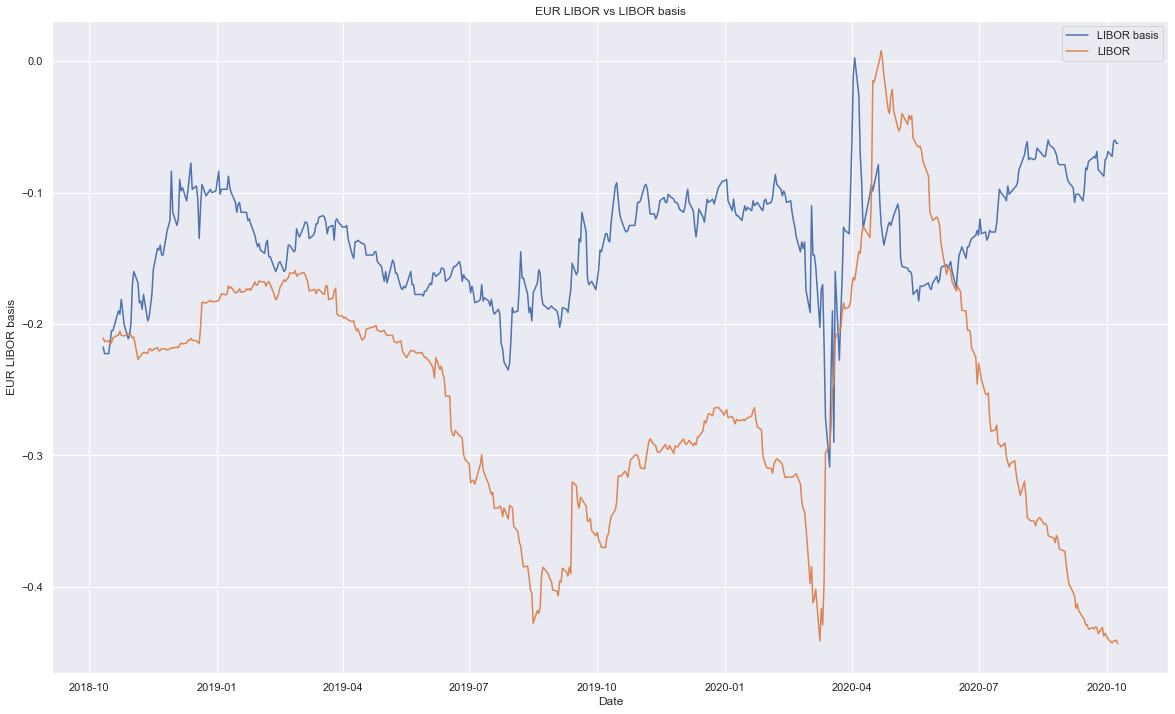

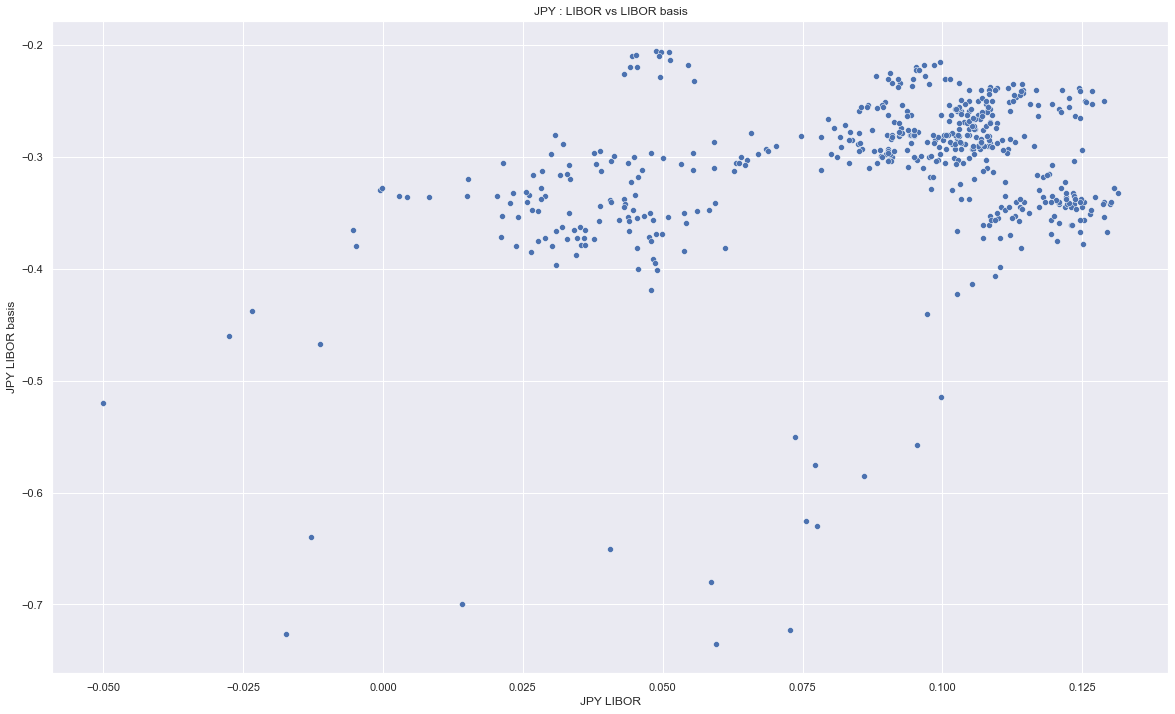

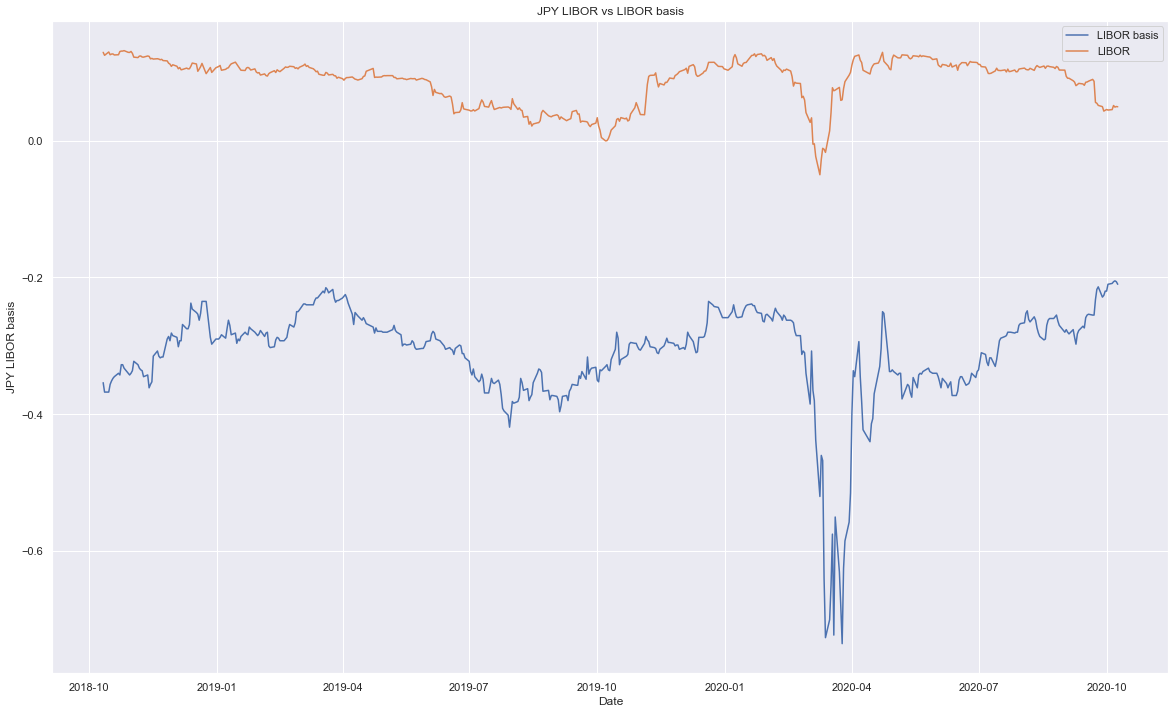

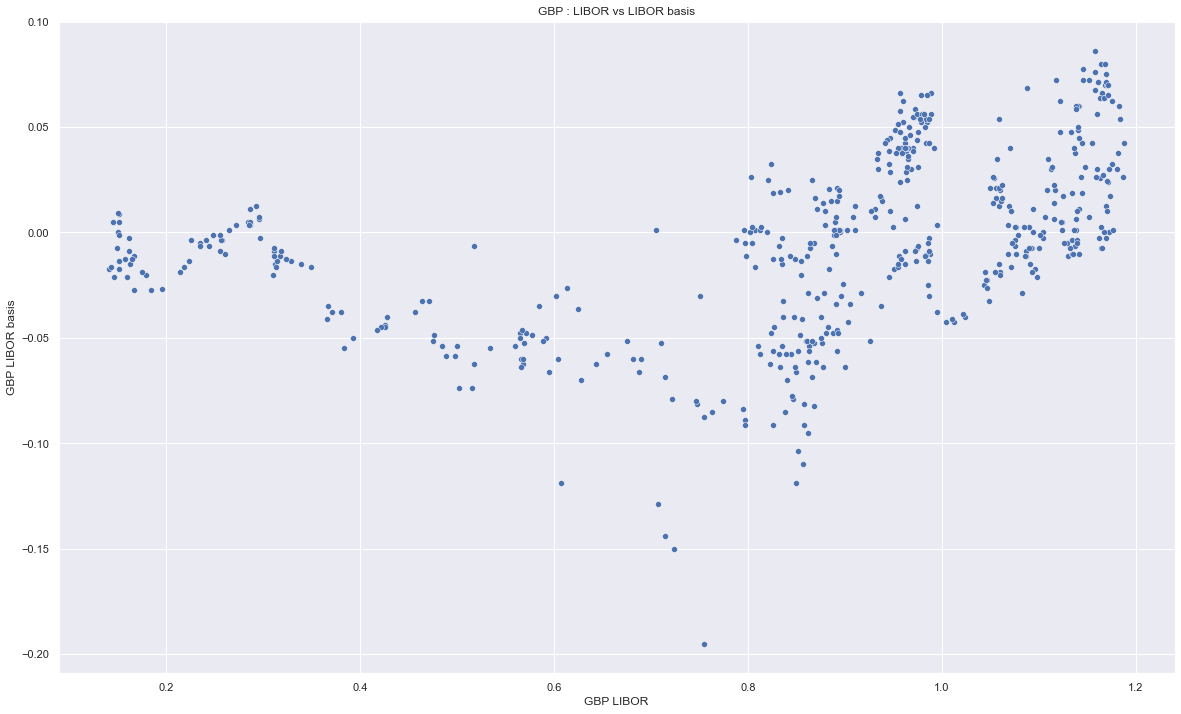

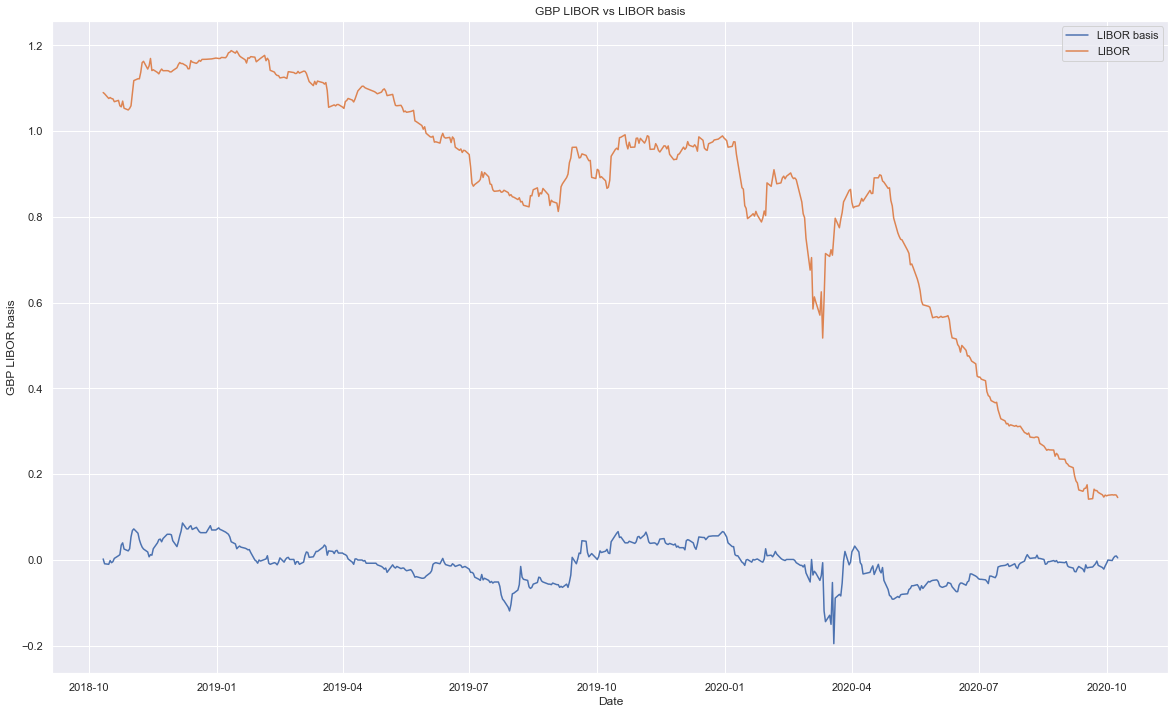

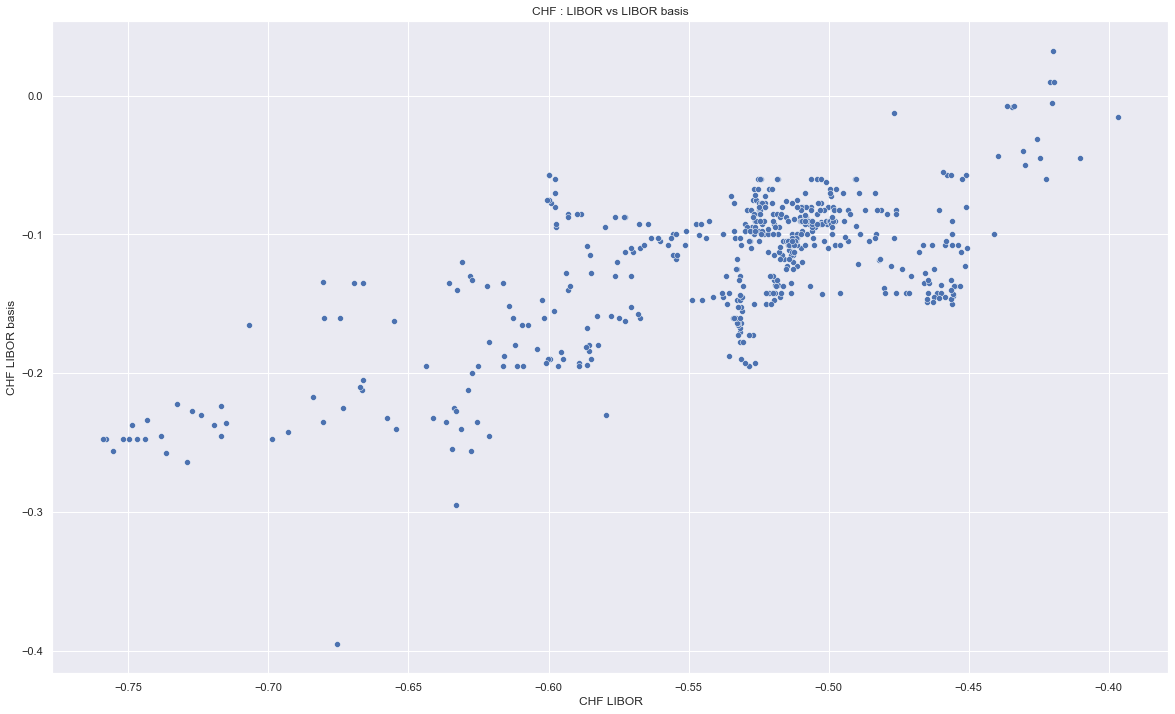

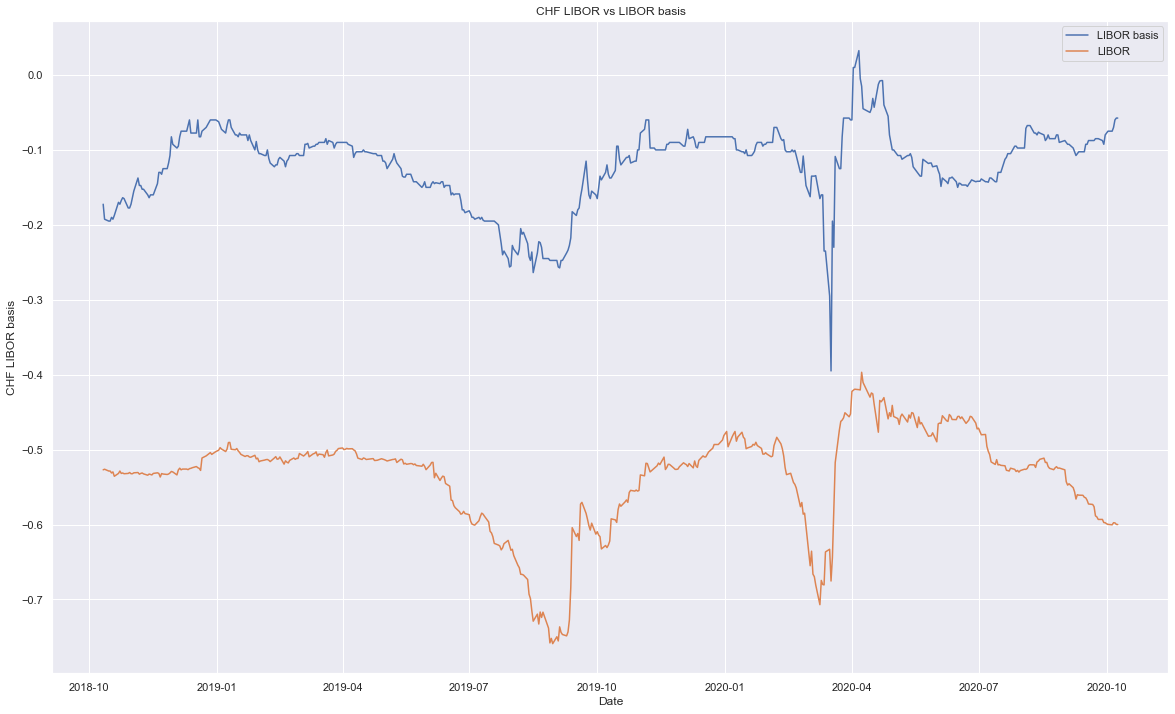

In [7]:
correlation_list = []

for ccy in currencies:
    df = pd.concat([xccy[ccy + " LIBOR basis"]/100, libor[ccy + " LIBOR"]], axis=1).dropna()
    fig, ax = plt.subplots(figsize=(20, 12))
    sns.scatterplot(x=ccy + " LIBOR", y=ccy + " LIBOR basis", data=df, ax=ax)
    ax.set_title(ccy + " : LIBOR vs LIBOR basis")
    plt.savefig(os.path.join('output', ccy + "_scatterplot_rates_vs_basis.jpg"), format='jpeg')
    plt.show()
    
    fig, ax = plt.subplots(figsize=(20, 12))
    sns.lineplot(x=df.index, y=ccy + " LIBOR basis", data=df, ax=ax, label='LIBOR basis')
    sns.lineplot(x=df.index, y=ccy + " LIBOR", data=df, ax=ax, label='LIBOR')
    ax.set_title(ccy + " LIBOR vs LIBOR basis")
    plt.savefig(os.path.join('output', ccy + "_lineplot_rates_vs_basis.jpg"), format='jpeg')
    plt.show()
    
    
    
    corr_pre_corona  = df[:'2020-02-28'].corr().values[0,1]
    corr_post_corona = df['2020-05-01':].corr().values[0,1]
    correlation_series = pd.Series([corr_pre_corona, corr_post_corona], index=["Until Feb'20", "After May'20"], name=ccy)
    
    correlation_list.append(correlation_series)

    
    

    
    
    
    
    


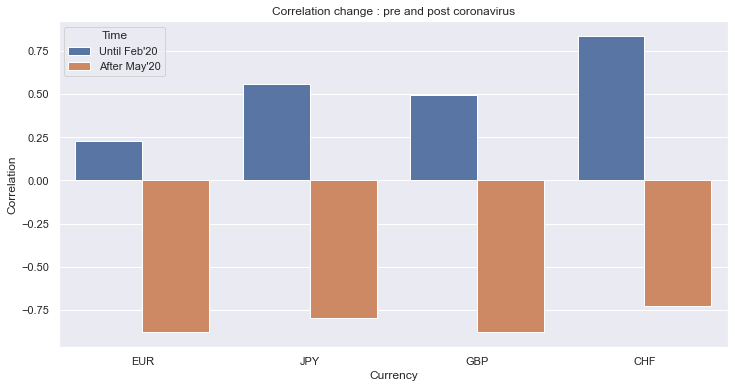

In [8]:
correlation = pd.concat(correlation_list, axis=1)
correlation.index.name = 'Time'
correlation.columns.name = 'Currency'
correlation = correlation.unstack()
correlation.name = 'Correlation'
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Currency', y='Correlation', hue='Time', data=correlation.reset_index(), ax=ax)
ax.set_title("Correlation change : pre and post coronavirus")
plt.savefig(os.path.join('output', 'Correlation_change_pre_and_post_corona.jpg'), format='jpeg')
plt.show()